In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from math import sqrt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Kaggle Open Competition
### Titanic Passenger Survival Prediction
Predict whether a passenger survived the Titanic disaster

#### Data Sets
###### Training Data
Columns: Passenger ID (Key), Survived, Passenger Class, Name, Sex, Age, Siblings, Parents, Ticket Number
         Ticket Number, Fare, Cabin, Embarked 
         
         891 Rows

###### Testing Data
Columns: Passenger ID (Key), Passenger Class, Name, Sex, Age, Siblings, Parents, Ticket Number
         Ticket Number, Fare, Cabin, Embarked 
         
         418 Rows

In [2]:
#Read data - 2 sets seperated for training and testing
data_training = pd.read_csv('C:\\Data Sources\\Titanic\\train.csv')

In [3]:
data_testing = pd.read_csv('C:\\Data Sources\\Titanic\\test.csv')

In [4]:
#Training data contains a 'Survived' column
data_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Testing data does not contain 'Survived' column
data_testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data_testing.shape

(418, 11)

In [7]:
data_training.shape

(891, 12)

In [8]:
data_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#Delete rows which will not have an impact on further analysis
data_training.drop(['Name','Ticket','Embarked','Cabin'], axis=1,inplace=True)

In [12]:
data_training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [13]:
data_training.shape

(891, 8)

In [14]:
#Check for any NaN values
data_training.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
dtype: bool

In [15]:
#There are 177 NaN values in the age column. Too many to drop
data_training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [16]:
data_training['Age'].mean()

29.69911764705882

In [17]:
#The mean and median are very close, either one should be fine to use to fill in NaN
data_training['Age'].median()

28.0

In [18]:
#Instead of dropping NaN values from 'Age', we fill in with the mean
data_training['Age'].fillna(data_training['Age'].mean(),inplace=True)

In [19]:
data_training.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
dtype: bool

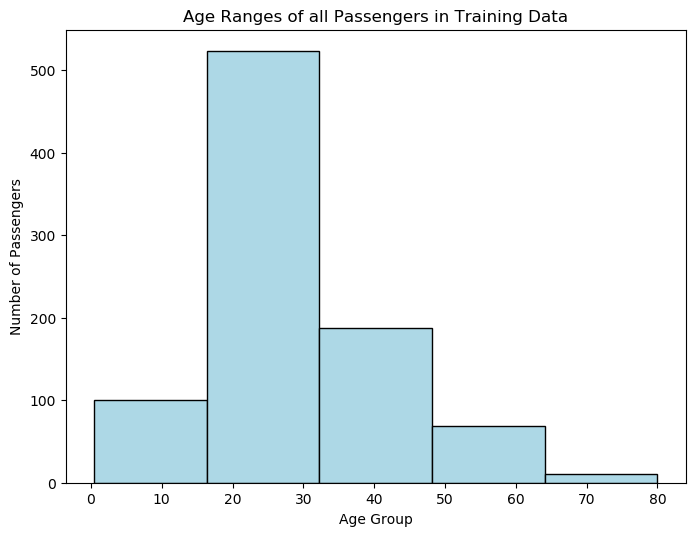

In [85]:
#Over 500 passengers were less than 30 years old

fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.hist(data_training['Age'], bins = 5, label = 'Age',color = 'lightblue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.title('Age Ranges of all Passengers in Training Data')
plt.savefig('Age Ranges of all Passengers.png')

In [21]:
sex = pd.value_counts(data_training['Sex'].values, sort = True)

In [22]:
sex

male      577
female    314
dtype: int64

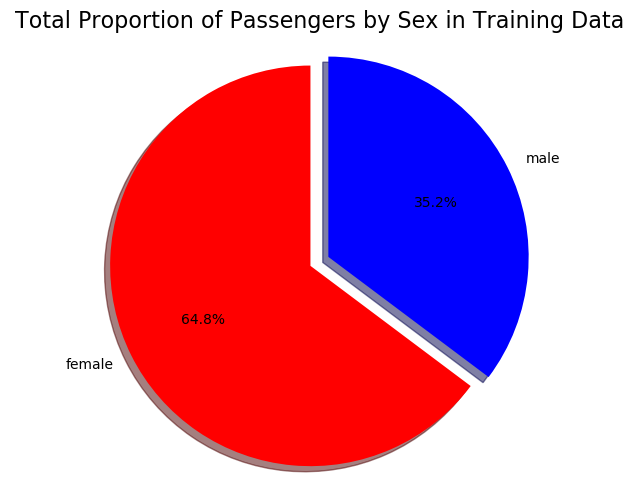

In [86]:
#Ratio of sexes for all passengers


fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
explode = (0.1, 0)
labels = ['female','male']
colors = ['red','blue']
plt.pie(sex, labels = labels, colors=colors, explode=explode,autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Total Proportion of Passengers by Sex in Training Data', fontsize=16)
plt.savefig('Total Proportion of Passengers - by Sex.png')



In [24]:
survived = data_training[data_training['Survived']==1]

In [25]:
survived.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708


In [26]:
survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 8 columns):
PassengerId    342 non-null int64
Survived       342 non-null int64
Pclass         342 non-null int64
Sex            342 non-null object
Age            342 non-null float64
SibSp          342 non-null int64
Parch          342 non-null int64
Fare           342 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 24.0+ KB


In [27]:
survived.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,NaN,-0.167362,0.060980,-0.033921,0.024641,0.093981
Survived,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,-0.167362,NaN,1.000000,-0.365191,-0.033300,0.021584,-0.538125
Age,0.060980,NaN,-0.365191,1.000000,-0.138317,-0.310489,0.153984
SibSp,-0.033921,NaN,-0.033300,-0.138317,1.000000,0.282498,0.122886
Parch,0.024641,NaN,0.021584,-0.310489,0.282498,1.000000,0.116519
Fare,0.093981,NaN,-0.538125,0.153984,0.122886,0.116519,1.000000


In [28]:
survived['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

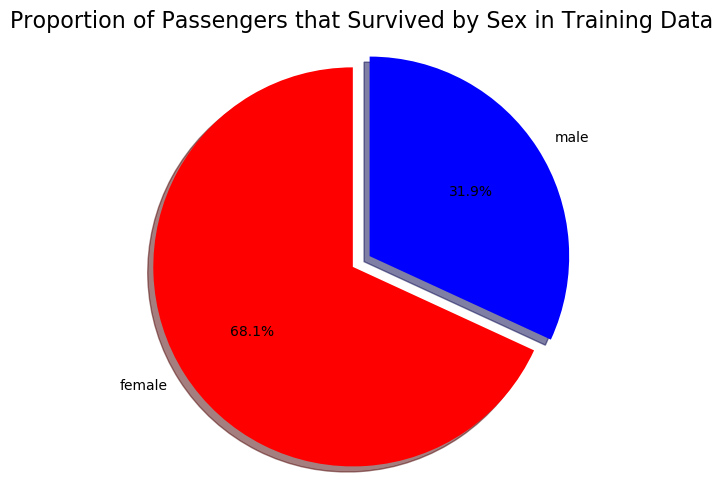

In [87]:
#Ratio of sexes of survivors


fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
explode = (0.1, 0)
labels = ['female','male']
colors = ['red','blue']
plt.pie(survived['Sex'].value_counts(), labels = labels, colors=colors, explode=explode,autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Proportion of Passengers that Survived by Sex in Training Data', fontsize=16)
plt.savefig('Proportion of Passengers that Survived - by Sex.png')


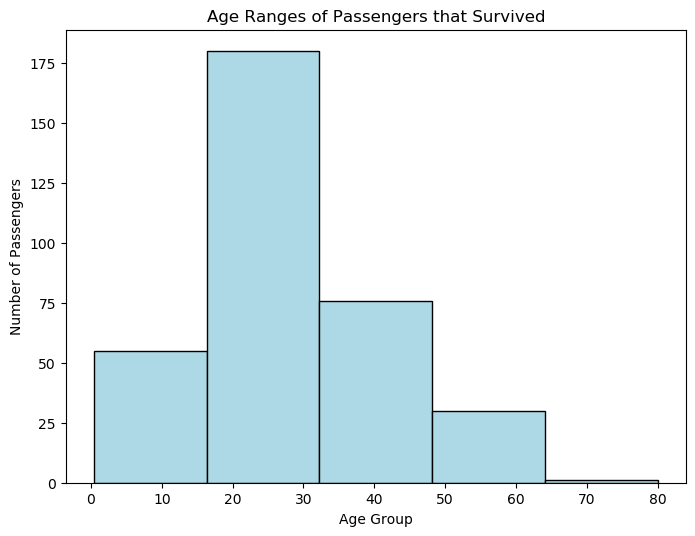

In [30]:

fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.hist(survived['Age'], bins = 5, label = 'Age',color = 'lightblue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.title('Age Ranges of Passengers that Survived')
plt.savefig('Age Ranges of Passengers that Survived.png')

In [31]:
data_training['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

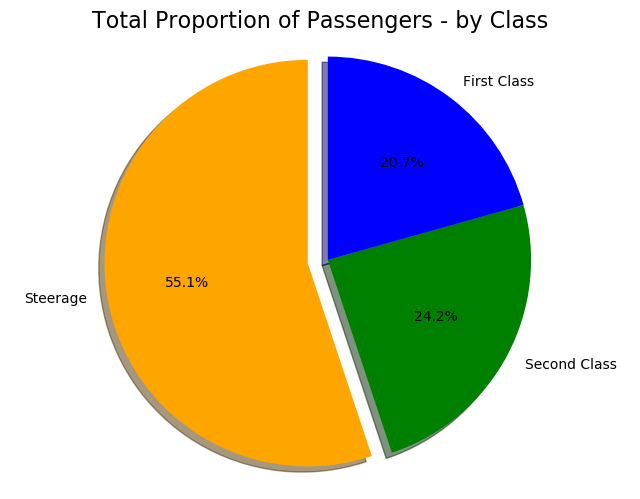

In [32]:
#Passengers broken down by class
labels = ['Steerage','Second Class', 'First Class']



fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
explode = (0.1, 0, 0)

colors = ['Orange','Green','blue']
plt.pie(data_training['Pclass'].value_counts(), labels = labels, colors=colors, explode=explode,autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Total Proportion of Passengers - by Class', fontsize=16)
plt.savefig('Total Proportion of Passengers - by Class')


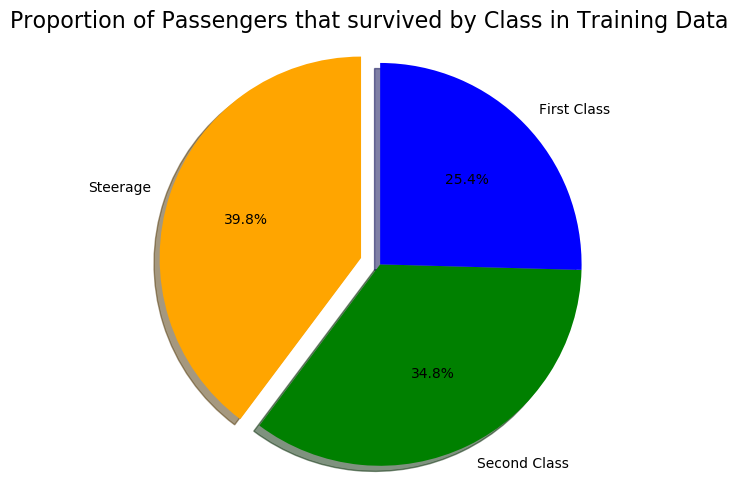

In [88]:
#Survived Passengers broken down by class
labels = ['Steerage','Second Class', 'First Class']




fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
explode = (0.1, 0, 0)

colors = ['Orange','Green','blue']
plt.pie(survived['Pclass'].value_counts(), labels = labels, colors=colors, explode=explode,autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')

plt.title('Proportion of Passengers that survived by Class in Training Data', fontsize=16)
plt.savefig('Proportion of Passengers that survived - by Class')

In [34]:
mask1 = survived['Pclass']==3

In [35]:
steerage = survived[mask1]

In [36]:
steerage['Sex'].value_counts()

female    72
male      47
Name: Sex, dtype: int64

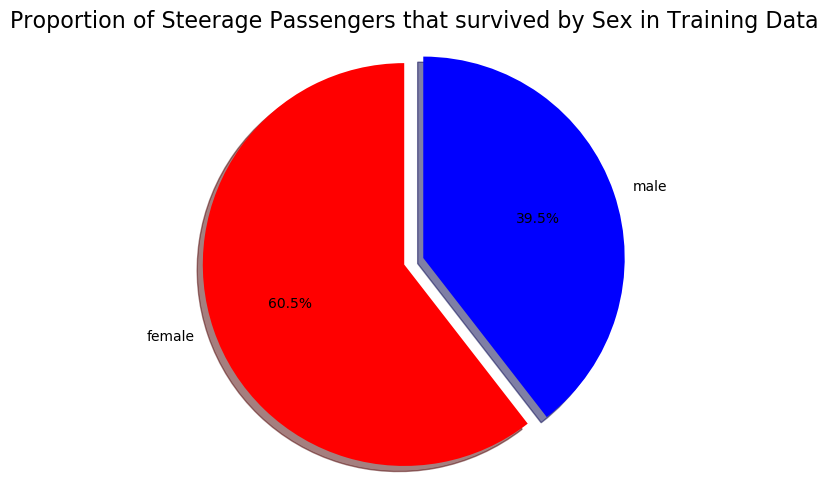

In [89]:
labels = ['female','male']

fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
explode = (0.1, 0)

colors = ['red','blue']
plt.pie(steerage['Sex'].value_counts(), labels = labels, colors=colors, explode=explode,autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Proportion of Steerage Passengers that survived by Sex in Training Data', fontsize=16)
plt.savefig('Proportion of Steerage Passengers that survived - by Sex')


In [38]:
mask3 = survived['Pclass']==1

In [39]:
firstclass = survived[mask3]

In [40]:
firstclass['Sex'].value_counts()

female    91
male      45
Name: Sex, dtype: int64

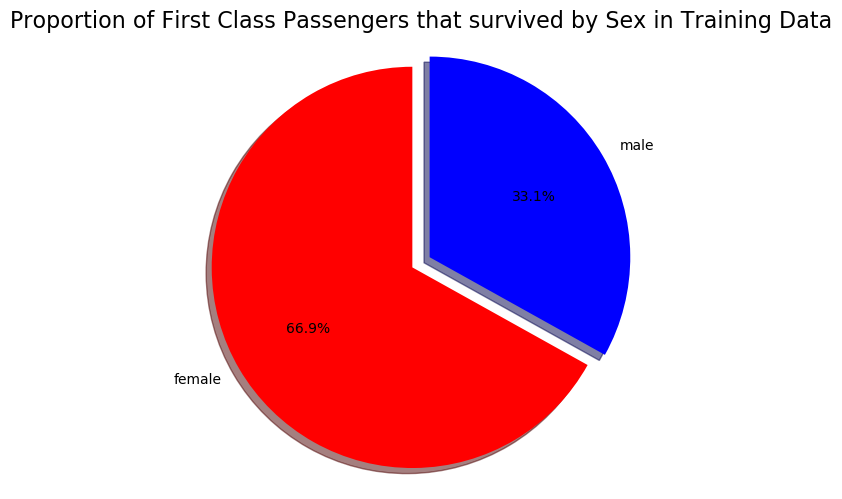

In [90]:
labels = ['female','male']




fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
explode = (0.1, 0)

colors = ['red','blue']
plt.pie(firstclass['Sex'].value_counts(), labels = labels, colors=colors, explode=explode,autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Proportion of First Class Passengers that survived by Sex in Training Data', fontsize=16)
plt.savefig('Proportion of First Class Passengers that survived - by Sex')


In [42]:
#We will simplify the two columns SibSp and Parch into one column
data_training['family'] = data_training.SibSp + data_training.Parch

In [43]:
data_testing['family'] = data_testing.SibSp + data_testing.Parch

In [44]:
data_training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,1
4,5,0,3,male,35.0,0,0,8.0500,0


In [45]:
data_testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [46]:
data_testing.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
family           0
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

## Prepare Testing dataset

In [47]:
#Drop columns in testing dataset to match training dataset
data_testing.drop(['Name','Ticket','Embarked','Cabin'], axis=1,inplace=True)

In [48]:
#Also drop Parch and SibSp columns since we have simplified them to the family column.
#This columns refer to the number of siblings and the number of parents to each passenger.
data_training.drop(['Parch','SibSp'], axis=1,inplace=True)

In [49]:
data_testing.drop(['Parch','SibSp'], axis=1,inplace=True)

In [50]:
#No NaN rows
data_testing.columns.values

array(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'family'],
      dtype=object)

In [51]:
data_training.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare',
       'family'], dtype=object)

In [52]:
#One Fare entry 86 Age entries are null
data_testing.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
family          0
Sex             0
Pclass          0
PassengerId     0
dtype: int64

In [53]:
data_testing['Fare'].fillna(data_testing['Fare'].mean(),inplace=True)

In [54]:
data_testing.isnull().sum().sort_values(ascending = False)

Age            86
family          0
Fare            0
Sex             0
Pclass          0
PassengerId     0
dtype: int64

In [55]:
data_testing['Age'].fillna(data_testing['Age'].mean(),inplace=True)


In [56]:
data_testing.isnull().sum().sort_values(ascending = False)

family         0
Fare           0
Age            0
Sex            0
Pclass         0
PassengerId    0
dtype: int64

In [57]:
data_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
Fare           418 non-null float64
family         418 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [58]:
#Replace the Sex column with ints - Create dummy column
dummy_sex_train = pd.get_dummies(data_training['Sex'])

In [59]:
dummy_sex_train.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [60]:
data_training = pd.concat([data_training, dummy_sex_train], axis= 1 )

In [61]:
#Binary variables for Male / Female
data_training.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,family,female,male
0,1,0,3,male,22.0,7.2500,1,0,1
1,2,1,1,female,38.0,71.2833,1,1,0
2,3,1,3,female,26.0,7.9250,0,1,0
3,4,1,1,female,35.0,53.1000,1,1,0
4,5,0,3,male,35.0,8.0500,0,0,1


In [62]:
#Repeat for Testing dataset
dummy_sex_test = pd.get_dummies(data_testing['Sex'])

In [63]:
dummy_sex_test.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [64]:
data_testing = pd.concat([data_testing, dummy_sex_test], axis= 1 )

In [65]:
data_testing.head()

,PassengerId,Pclass,Sex,Age,Fare,family,female,male
0,892,3,male,34.5,7.8292,0,0,1
1,893,3,female,47.0,7.0000,1,1,0
2,894,2,male,62.0,9.6875,0,0,1
3,895,3,male,27.0,8.6625,0,0,1
4,896,3,female,22.0,12.2875,2,1,0


In [66]:
#Drop original sex column in both datasets
data_testing.drop(['Sex'], axis=1, inplace=True)

In [67]:
data_training.drop(['Sex'], axis = 1, inplace = True)

## Machine Learning

In [68]:
# separating our independent and dependent variable

X_train = data_training.drop(['Survived'], axis=1)
Y_train = data_training["Survived"]

X_test = data_testing

#X_train = train_df.drop("Survived",axis=1)
#Y_train = train_df["Survived"]
#X_test  = test_df.drop("PassengerId",axis=1).copy()

In [69]:
X_test.head()

,PassengerId,Pclass,Age,Fare,family,female,male
0,892,3,34.5,7.8292,0,0,1
1,893,3,47.0,7.0000,1,1,0
2,894,2,62.0,9.6875,0,0,1
3,895,3,27.0,8.6625,0,0,1
4,896,3,22.0,12.2875,2,1,0


In [70]:
#Our training data has the same columns as our testing dataset
X_train.head()

,PassengerId,Pclass,Age,Fare,family,female,male
0,1,3,22.0,7.2500,1,0,1
1,2,1,38.0,71.2833,1,1,0
2,3,3,26.0,7.9250,0,1,0
3,4,1,35.0,53.1000,1,1,0
4,5,3,35.0,8.0500,0,0,1


In [71]:
#Decision Tree
#We will not be using train_test_split since our data has already been split

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, Y_train)
y_pred = dec_tree.predict(X_test)

In [72]:
#Correct number of predictions
y_pred.shape

(418,)

In [73]:
#Add prediction as column into new dataframe

data_testing['Prediction'] = y_pred

In [74]:
data_testing.head()

,PassengerId,Pclass,Age,Fare,family,female,male,Prediction
0,892,3,34.5,7.8292,0,0,1,0
1,893,3,47.0,7.0000,1,1,0,0
2,894,2,62.0,9.6875,0,0,1,0
3,895,3,27.0,8.6625,0,0,1,1
4,896,3,22.0,12.2875,2,1,0,0


In [75]:
#Formatting for export of file for submission
submission = data_testing[['PassengerId','Prediction']].copy()
submission.rename(columns = {'Prediction': 'Survived'}, inplace = True)

In [76]:
#Export results for submition
submission.to_csv('titanic_submission.csv', index=False)

In [77]:
prediction_survived = data_testing[data_testing['Prediction']==1]

In [78]:
prediction_survived.shape

(106, 8)

In [79]:
prediction_survived['male'].value_counts()
prediction_survived['female'].value_counts()

1    86
0    20
Name: female, dtype: int64

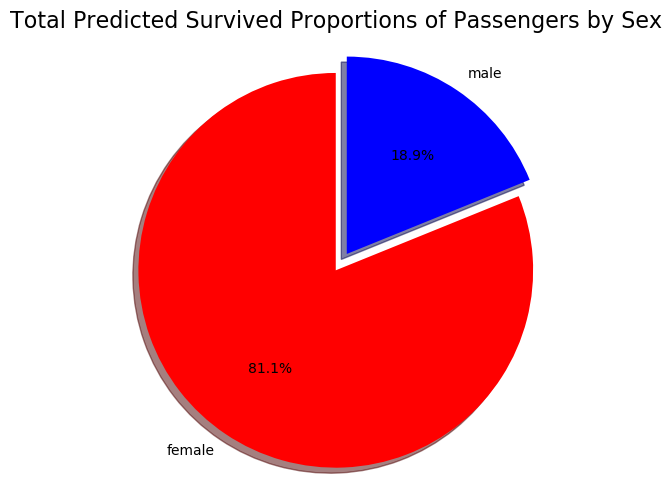

In [80]:
labels = ['female','male']



fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
explode = (0.1, 0)

colors = ['red','blue']
plt.pie(prediction_survived['male'].value_counts(), labels = labels, colors=colors, explode=explode,autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Total Predicted Survived Proportions of Passengers by Sex', fontsize=16)
plt.savefig('Total Predicted Survived Proportions of Passengers by Sex')


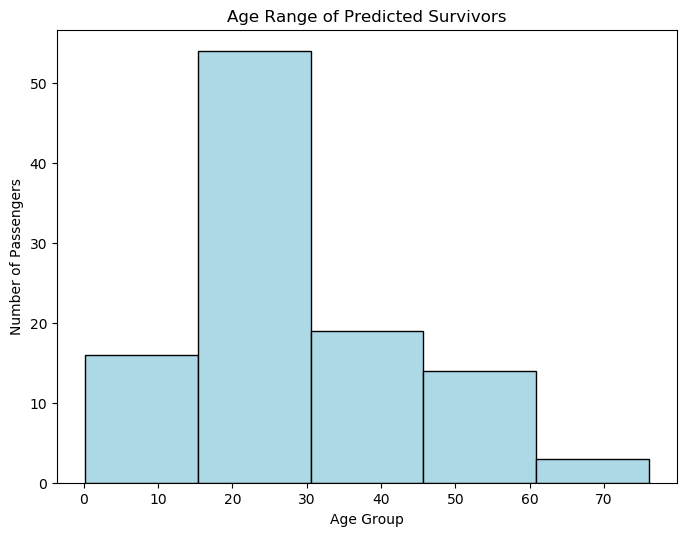

In [81]:

fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.hist(prediction_survived['Age'], bins = 5, label = 'Age', color = 'lightblue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.title('Age Range of Predicted Survivors')
plt.savefig('Age Range of Predicted Survivors.png')

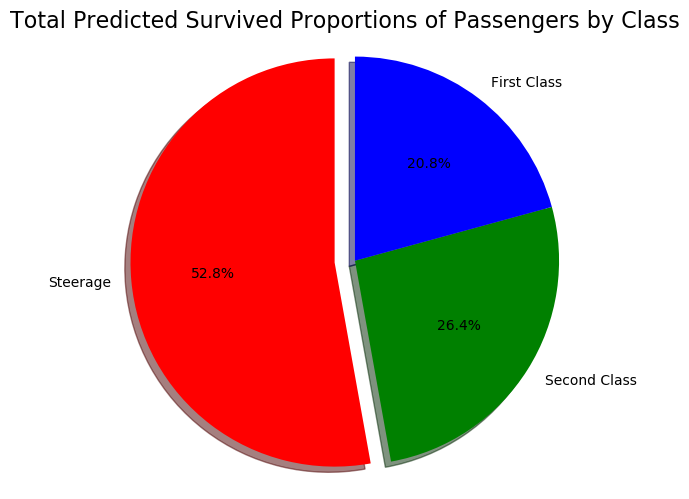

In [82]:


fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
explode = (0.1, 0, 0)
labels = ['Steerage','Second Class', 'First Class']
colors = ['red','green','blue']
plt.pie(prediction_survived['Pclass'].value_counts(), labels = labels, colors=colors, explode=explode,autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')

plt.title('Total Predicted Survived Proportions of Passengers by Class',fontsize=16)
plt.savefig('Total Predicted Survived Proportions of Passengers by Class')


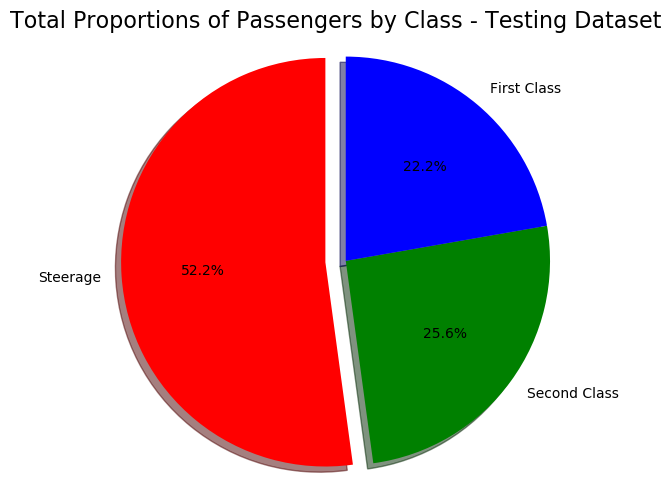

In [83]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
explode = (0.1, 0, 0)
labels = ['Steerage','Second Class', 'First Class']
colors = ['red','green','blue']
plt.pie(data_testing['Pclass'].value_counts(), labels = labels, colors=colors, explode=explode,autopct='%1.1f%%', \
        shadow=True, startangle=90)
plt.axis('equal')

plt.title('Total Proportions of Passengers by Class - Testing Dataset', fontsize=16)
plt.savefig('Total Proportions of Passengers by Class - Testing Dataset')



In [84]:
data_testing['family'].value_counts()

0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: family, dtype: int64

Final Accuracy after submission with Decision Tree Classifier is 76%, using the following labels:

Class, Sex, Age (mean used for NaN), Fare (mean used for NaN), and Family (combined Siblings and Parents labels) 